# Train Q on a LQR environment

## Define paramters

In [1]:
%load_ext autoreload
%autoreload 2

import jax

# keys
seed = 1
key = jax.random.PRNGKey(seed)
env_key, key = jax.random.split(key)
shuffle_key, q_network_key, random_weights_key = jax.random.split(key, 3)

# Box over states and actions
max_discrete_state = 5
n_discrete_states = 7
max_discrete_action = 5
n_discrete_actions = 7

gamma = 1

# Q function
layers_dimension = [50]
random_weights_range = 1

# Q trainings
tolerance = 0.1
max_iterations = 10000
batch_size = 6
learning_rate = {"first": 0.001, "last": 0.0005, "duration": max_iterations}

# Visualisation
plot_freq = 200
sleeping_time = 0

## Define environment

In [122]:
import numpy as np

from pbo.environment.linear_quadratic import LinearQuadraticEnv


discrete_states = np.linspace(-max_discrete_state, max_discrete_state, n_discrete_states)
state_box_half_size = max_discrete_state / n_discrete_states
discrete_states_boxes = np.linspace(
    -max_discrete_state - state_box_half_size, max_discrete_state + state_box_half_size, n_discrete_states + 1
)

discrete_actions = np.linspace(-max_discrete_action, max_discrete_action, n_discrete_actions)
action_box_half_size = max_discrete_action / n_discrete_actions
discrete_actions_boxes = np.linspace(
    -max_discrete_action - action_box_half_size, max_discrete_action + action_box_half_size, n_discrete_actions + 1
)

env = LinearQuadraticEnv(env_key, max_init_state=max_discrete_state)

sdfskldjf
False
sdfskldjf
False
sdfskldjf
False
sdfskldjf
True
Transition: s' = As + Ba
Transition: s' = -0.10490131378173828s + -0.6472394466400146a
Reward: Qs² + Ra² + 2 Ssa
Reward: -0.21946656703948975s² + -0.19231724739074707a² + -0.11510777473449707sa
True


In [121]:
def check_ricatti_equation(P: float, A: float, B: float, Q: float, R: float, S: float):
    return abs(Q + A ** 2 * P - (S + A * P * B) ** 2 / (R + B **2 * P) - P) < 1e-8
    

parameters_key_, reset_key = jax.random.split(env_key) 

parameters_key, key = jax.random.split(parameters_key_)
A = jax.random.uniform(key, (1, 1), minval=-1, maxval=1)
parameters_key, key = jax.random.split(parameters_key)
B = jax.random.uniform(key, (1, 1), minval=-1, maxval=1)
parameters_key, key = jax.random.split(parameters_key)
Q = jax.random.uniform(key, (1, 1), minval=-1, maxval=0)
parameters_key, key = jax.random.split(parameters_key)
R = jax.random.uniform(key, (1, 1), minval=-1, maxval=1)
parameters_key, key = jax.random.split(parameters_key)
S = jax.random.uniform(key, (1, 1), minval=-0.5, maxval=0.5)

P = jnp.array(sc_linalg.solve_discrete_are(A, B, Q, R, s=S))
print(
    check_ricatti_equation(
        P[0, 0], A[0, 0], B[0, 0], Q[0, 0], R[0, 0], S[0, 0]
    )
)
A, B, Q, R

False


(DeviceArray([[-0.25750542]], dtype=float32),
 DeviceArray([[0.48829055]], dtype=float32),
 DeviceArray([[-0.8696904]], dtype=float32),
 DeviceArray([[0.7071922]], dtype=float32))

In [73]:
env.P

DeviceArray([[-39.241913]], dtype=float32)

In [78]:
sc_linalg.solve_discrete_are(env.A, env.B, env.Q, env.R, s=env.S)

array([[-39.24191228]])

In [86]:
A.dtype

dtype('int32')

In [81]:
import scipy.linalg as sc_linalg

A = jnp.array([[5]])
B = jnp.array([[9]])
Q = jnp.array([[2]])
R = jnp.array([[4]])
S = jnp.array([[5]])

P = sc_linalg.solve_discrete_are(A, B, Q, R, s=S)[0, 0]

P

-2.2782484861758303

In [91]:
Q + A ** 2 * P - (S + A * P * B) ** 2 / (R + B ** 2 * P)

DeviceArray([[-0.29060966]], dtype=float32)

In [123]:
import numpy as np
import jax.numpy as jnp 


def theo_q(env, state, action):
    k = env.Q[0, 0] + env.A[0, 0] ** 2 * env.P[0, 0]
    i = env.S[0, 0] + env.A[0, 0] * env.B[0, 0] * env.P[0, 0]
    m = env.R[0, 0] + env.B[0, 0] ** 2 * env.P[0, 0]

    return state ** 2 * k + 2 * state * action * i + action ** 2 * m



def ex_q(env, state, action):
    first = True
    reward = [float("inf")]
    q_value = 0

    env.reset(state=state)

    while abs(reward[0]) > 1e-9:
        if first:
            _, reward, _, _ = env.step(action)
            first = False
        else:
            _, reward, _, _ = env.step(env.optimal_action())

        q_value += reward[0]

    return q_value


state = 1
action = 4

print("Ex q", ex_q(env, jnp.array([state]), jnp.array([action])))
print("Theo q", theo_q(env, state, action))

Ex q -5.2326875
Theo q -5.2326875


In [7]:
import numpy as np
import jax.numpy as jnp 


def theo_v(env, state):
    return state ** 2 * env.P[0, 0]



def ex_v(env, state):
    reward = [float("inf")]
    v_value = 0

    env.reset(state=state)

    while abs(reward[0]) > 1e-9:
        _, reward, _, _ = env.step(env.optimal_action())

        v_value += reward[0]

    return v_value


state = 1

print("Ex v", ex_v(env, jnp.array([state])))
print("Theo v", theo_v(env, state))

Ex v -0.52837765
Theo v -39.241913


In [31]:
env.P

DeviceArray([[-39.241913]], dtype=float32)

In [30]:
state = 590
action = -3254

env.reset(jnp.array([state]))

reward_t = state ** 2 * env.Q[0, 0] + 2 * state * action * env.S[0, 0] + action ** 2 * env.R[0, 0]
next_state_t = state * env.A[0, 0] + action * env.B[0, 0]

next_state_ex, reward_ex, _, _ = env.step(jnp.array([action]))

print("Rewards:", reward_t, reward_ex)
print("Next state:", next_state_t, next_state_ex)

Rewards: 252968.62 [252968.69]
Next state: -2699.1597 [-2699.1597]


## Collect samples

### Samples on the mesh

In [6]:
import jax.numpy as jnp

from pbo.sample_collection.replay_buffer import ReplayBuffer

n_samples = n_discrete_states * n_discrete_actions
replay_buffer = ReplayBuffer()

for state in discrete_states:
    for action in discrete_actions:
        env.reset(jnp.array([state]))
        next_state, reward, _, _ = env.step(jnp.array([action]))

        replay_buffer.add(jnp.array([state]), jnp.array([action]), reward, next_state)

## Visualize samples

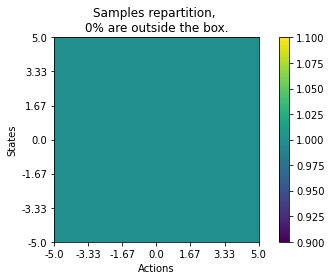

In [7]:
from pbo.sample_collection.count_samples import count_samples
from pbo.utils.state_action_mesh import StateActionMesh


samples_count, n_outside_boxes = count_samples(replay_buffer, discrete_states_boxes, discrete_actions_boxes)
samples_visu_mesh = StateActionMesh(discrete_states, discrete_actions, sleeping_time=0)

samples_visu_mesh.set_values(samples_count, zeros_to_nan=True)
samples_visu_mesh.show(
    f"Samples repartition, \n{int(100 * n_outside_boxes / n_samples)}% are outside the box."
)


## Optimal Q function

In [34]:
import numpy as np 


def theoretical_q(env, state, action):
    return state ** 2 * (env.Q[0, 0] + env.A[0, 0] ** 2 * env.P[0, 0]) + 2 * state * action * (env.S[0, 0] + env.A[0, 0] * env.B[0, 0] * env.P[0, 0]) + action ** 2 * (env.R[0, 0] + env.B[0, 0] ** 2 * env.P[0, 0])

    
def compute_optimal_Q_lqr(
    env,
    states: np.ndarray,
    actions: np.ndarray,
) -> np.ndarray:
    Q_values = np.zeros((len(states), len(actions)))

    for idx_state, state in enumerate(states):
        for idx_action, action in enumerate(actions):
            Q_values[idx_state, idx_action] = theoretical_q(env, state, action)

    return Q_values

In [38]:
state = 1
action = 4

get_Q_value(env, jnp.array([state]), jnp.array([action]), 1)
theoretical_q(env, state, action)

DeviceArray(-225.04744, dtype=float32)

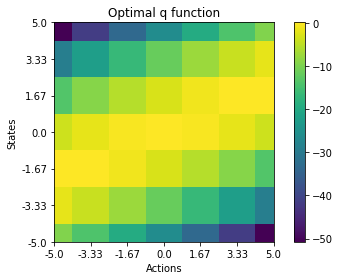

In [28]:
import pandas as pd
from pbo.utils.compute_Q_lqr import compute_Q_lqr, get_Q_value


optimal_q = compute_Q_lqr(env, discrete_states, discrete_actions, gamma)
optimal_q_pd = pd.DataFrame(optimal_q, index=jnp.around(discrete_states, 2), columns=jnp.around(discrete_actions, 2))

q_visu_mesh = StateActionMesh(discrete_states, discrete_actions, sleeping_time)

q_visu_mesh.set_values(optimal_q)
q_visu_mesh.show("Optimal q function")

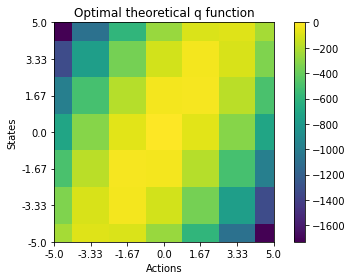

In [23]:
q_visu_mesh.set_values(optimal_theoretical_q - optimal_q)
q_visu_mesh.show("Optimal theoretical q function")

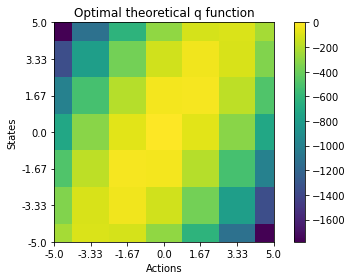

In [19]:
import pandas as pd
from pbo.utils.compute_Q_lqr import compute_Q_lqr


optimal_theoretical_q = compute_optimal_Q_lqr(env, discrete_states, discrete_actions)

q_visu_mesh = StateActionMesh(discrete_states, discrete_actions, sleeping_time)

q_visu_mesh.set_values(optimal_theoretical_q)
q_visu_mesh.show("Optimal theoretical q function")

## Build q network and its dataloader

In [6]:
from pbo.networks.q import FullyConnectedQ
from pbo.sample_collection.dataloader import SampleDataLoader


q = FullyConnectedQ(
    layers_dimension=layers_dimension,
    network_key=q_network_key,
    random_weights_range=random_weights_range,
    random_weights_key=random_weights_key,
    action_range_on_max=0,
    n_actions_on_max=0,
)

replay_buffer.cast_to_jax_array()
data_loader = SampleDataLoader(replay_buffer, batch_size, shuffle_key)

## Train Q 
Objective: See if the representation power of the network of Q is powerful enough to represent the optimal Q

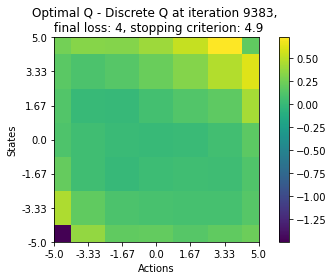

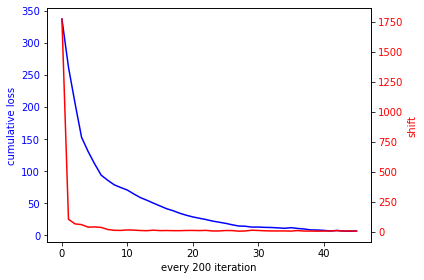

In [7]:
import optax
import jax.numpy as jnp

from pbo.utils.shared_axis_plot import shared_axis_plot

learning_rate_schedule = optax.linear_schedule(learning_rate["first"], learning_rate["last"], learning_rate["duration"])
optimizer = optax.adam(learning_rate_schedule)
optimizer_state = optimizer.init(q.params)

# For visualization
former_discrete_q = q.discretize(q.to_weights(q.params).reshape((1, -1)), discrete_states, discrete_actions)[0]
cumulative_losses = []
shifts = []

iteration = 0
cumulative_loss = float("inf")
stopping_criterion = tolerance * data_loader.n_samples

while cumulative_loss > stopping_criterion and iteration < max_iterations:
    cumulative_loss = 0

    data_loader.shuffle()
    for batch in data_loader:
        # the target is the optimal Q
        target = jnp.diag(optimal_q_pd.loc[jnp.around(batch["state"].flatten(), 2), jnp.around(batch["action"].flatten(), 2)].values).reshape(-1, 1)

        loss, grad_loss = q.l1_loss_and_grad(q.params, batch["state"], batch["action"], target)
        updates, data_optimizer_state = optimizer.update(
            grad_loss, optimizer_state
        )
        q.params = optax.apply_updates(q.params, updates)

        cumulative_loss += loss

    iteration += 1

    # Visualization
    if iteration % plot_freq == 0:
        discrete_q = q.discretize(q.to_weights(q.params).reshape((1, -1)), discrete_states, discrete_actions)[0]
        shift = jnp.abs(discrete_q - former_discrete_q).sum()
        
        q_visu_mesh.set_values(optimal_q - discrete_q)
        q_visu_mesh.show(f"Optimal Q - Discrete Q at iteration {iteration}, \nloss: {int(cumulative_loss)}, shift: {int(shift)}, stopping criterion: {stopping_criterion}")
        
        cumulative_losses.append(cumulative_loss)
        shifts.append(shift)
        former_discrete_q = discrete_q

final_discrete_q = q.discretize(q.to_weights(q.params).reshape((1, -1)), discrete_states, discrete_actions)[0]
q_visu_mesh.set_values(optimal_q - final_discrete_q)
q_visu_mesh.show(f"Optimal Q - Discrete Q at iteration {iteration}, \n final loss: {int(cumulative_loss)}, stopping criterion: {stopping_criterion}")

shared_axis_plot(cumulative_losses, shifts, f"every {plot_freq} iteration", "cumulative loss", "shift")

## Maximizing Q over actions

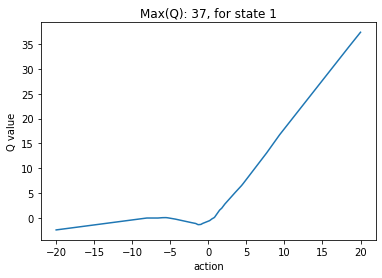

In [8]:
import matplotlib.pyplot as plt


random_q_params = q.to_params(q.random_weights())
# random_q_params = q.to_params(q.random_init_weights())
random_state = jnp.array([np.random.uniform(-max_discrete_state, max_discrete_state)])

discrete_actions_on_max = jnp.linspace(
    -20, 20, num=10000
).reshape((-1, 1))

q_values = q.network.apply(
    random_q_params, random_state.repeat(len(discrete_actions_on_max)).reshape((-1, 1)), discrete_actions_on_max
)

plt.plot(discrete_actions_on_max, q_values)
plt.xlabel("action")
plt.ylabel("Q value")
_ = plt.title(f"Max(Q): {int(q_values.max())}, for state {int(random_state[0])}")

- Q is not spiky so discretizing the action space should work
- Taking random init weights gives smaller maximums than taking random weights